# Project: Unsupervised learningn - Identify Customer Segments

In this project, unsupervised learning techniques are applied to identify segments of the population that form the core customer base for a mail-order sales company in Germany. In first step Germany sosioecominical data is used to identify relevant segments in general population. The segmentation model is then applied on the mail-order company customer data to segment the customer based on the general population segments.  These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. 

The demographic data used in the project is provided by Bertelsmann Arvato Analytics. Data is not included in the GitHub repository due to copyright.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns). (not included in github due to copyright)
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns). (not included in github due to copyright)
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood.  This information is used to cluster the general population into groups with similar demographic properties. Then, it is evaluatede how the people in the customers dataset fit into those created clusters. It is expected that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

First the demographics data for the general population is loaded into a pandas DataFrame, and the same is done for the feature attributes summary. All of the `.csv` data files in this project are semicolon (`;`) delimited.

In [82]:
# Load in the general demographics data.
azdias = pd.read_csv('./Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('./AZDIAS_Feature_Summary.csv', sep=';')

In [83]:
pd.options.display.max_rows = 999

In [84]:
# Check the structure of the data after it's loaded 
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [85]:
azdias.head(5).transpose()

,0,1,2,3,4
AGER_TYP,-1,-1,-1,2,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3
ANREDE_KZ,1,2,2,2,1
CJT_GESAMTTYP,2,5,3,2,5
FINANZ_MINIMALIST,3,1,1,4,4
FINANZ_SPARER,4,5,4,2,3
FINANZ_VORSORGER,3,2,1,5,4
FINANZ_ANLEGER,5,5,2,2,1
FINANZ_UNAUFFAELLIGER,5,4,3,1,3
FINANZ_HAUSBAUER,3,5,5,2,2


In [86]:
azdias.tail(5).transpose()

,891216,891217,891218,891219,891220
AGER_TYP,-1,-1,-1,-1,-1
ALTERSKATEGORIE_GROB,3,2,2,1,4
ANREDE_KZ,2,1,2,1,1
CJT_GESAMTTYP,5,4,4,3,1
FINANZ_MINIMALIST,1,3,2,1,4
FINANZ_SPARER,4,3,4,5,2
FINANZ_VORSORGER,2,3,2,3,5
FINANZ_ANLEGER,5,2,5,5,2
FINANZ_UNAUFFAELLIGER,4,2,4,5,1
FINANZ_HAUSBAUER,4,3,3,5,5


In [87]:
azdias.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGER_TYP,891221.0,-0.358435,1.198724,-1.0,-1.0,-1.0,-1.0,3.0
ALTERSKATEGORIE_GROB,891221.0,2.777398,1.068775,1.0,2.0,3.0,4.0,9.0
ANREDE_KZ,891221.0,1.522098,0.499512,1.0,1.0,2.0,2.0,2.0
CJT_GESAMTTYP,886367.0,3.632838,1.595021,1.0,2.0,4.0,5.0,6.0
FINANZ_MINIMALIST,891221.0,3.074528,1.321055,1.0,2.0,3.0,4.0,5.0
FINANZ_SPARER,891221.0,2.821039,1.464749,1.0,1.0,3.0,4.0,5.0
FINANZ_VORSORGER,891221.0,3.401106,1.322134,1.0,3.0,3.0,5.0,5.0
FINANZ_ANLEGER,891221.0,3.033328,1.529603,1.0,2.0,3.0,5.0,5.0
FINANZ_UNAUFFAELLIGER,891221.0,2.874167,1.486731,1.0,2.0,3.0,4.0,5.0
FINANZ_HAUSBAUER,891221.0,3.075121,1.353248,1.0,2.0,3.0,4.0,5.0


In [88]:
# Check amount of missing datapoints per column
print('Total nan data points in azdias data:', azdias.isna().sum(axis = 0).sum())
azdias.isna().sum(axis = 0)

Total nan data points in azdias data: 4896838


AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. This file is used to make cleaning decisions during this stage of the project. First the demographics data is assessed in terms of missing data. 

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. The data that matches a 'missing' or 'unknown' value code is converted into a numpy NaN value. 

In [89]:
# Identify missing or unknown data values and convert them to NaNs; print summary of replaced values by feature column.

# Iterate over all the columns in azdias, identify 'missing' or 'unkown' code based on feat_info data and replace data to NaN
for column in azdias.columns:
    
    # Iterate for missing_or_unkown codes in feat_info for iterated column, and replace azdias data with NaN if code identified in data 
    for nan_item in feat_info[feat_info['attribute'] == column]['missing_or_unknown'].item().replace('[','').replace(']','').split(','): 
        if nan_item == '':
            print(column, nan_item,' empty')
        elif nan_item == 'X' or nan_item == 'XX':
            # Replace string coding (X or XX) with NaN
            print(column, nan_item,' string', ' replaced: ',np.sum(azdias[column] == nan_item))
            azdias[column].replace(nan_item, np.nan, inplace=True)       
        else:
            # Replace numerical coding (-1, 0, 9) with NaN
            print(column, int(nan_item),' num', ' replaced: ',np.sum(azdias[column] == int(nan_item)) )
            azdias[column].replace(int(nan_item), np.nan, inplace=True)    


AGER_TYP -1  num  replaced:  677503
AGER_TYP 0  num  replaced:  8340
ALTERSKATEGORIE_GROB -1  num  replaced:  0
ALTERSKATEGORIE_GROB 0  num  replaced:  0
ALTERSKATEGORIE_GROB 9  num  replaced:  2881
ANREDE_KZ -1  num  replaced:  0
ANREDE_KZ 0  num  replaced:  0
CJT_GESAMTTYP 0  num  replaced:  0
FINANZ_MINIMALIST -1  num  replaced:  0
FINANZ_SPARER -1  num  replaced:  0
FINANZ_VORSORGER -1  num  replaced:  0
FINANZ_ANLEGER -1  num  replaced:  0
FINANZ_UNAUFFAELLIGER -1  num  replaced:  0
FINANZ_HAUSBAUER -1  num  replaced:  0
FINANZTYP -1  num  replaced:  0
GEBURTSJAHR 0  num  replaced:  392318
GFK_URLAUBERTYP   empty
GREEN_AVANTGARDE   empty
HEALTH_TYP -1  num  replaced:  111196
HEALTH_TYP 0  num  replaced:  0
LP_LEBENSPHASE_FEIN 0  num  replaced:  92778
LP_LEBENSPHASE_GROB 0  num  replaced:  89718
LP_FAMILIE_FEIN 0  num  replaced:  72938
LP_FAMILIE_GROB 0  num  replaced:  72938
LP_STATUS_FEIN 0  num  replaced:  0
LP_STATUS_GROB 0  num  replaced:  0
NATIONALITAET_KZ -1  num  replaced:

In [90]:
# Check amount of missing datapoints after replacing missing_or_unkown codes with NaNs
print('Total nan data points in azdias data after assessing missing data:', azdias.isna().sum(axis = 0).sum())

Total nan data points in azdias data after assessing missing data: 8373929


#### Step 1.1.2: Assess Missing Data in Each Column

There are a few columns that are outliers in terms of the proportion of values that are missing. Matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function is used to visualize the distribution of missing value counts to find these columns.

(array([39., 40.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([0.        , 0.09975764, 0.19951527, 0.29927291, 0.39903054,
        0.49878818, 0.59854582, 0.69830345, 0.79806109, 0.89781872,
        0.99757636]),
 <a list of 10 Patch objects>)

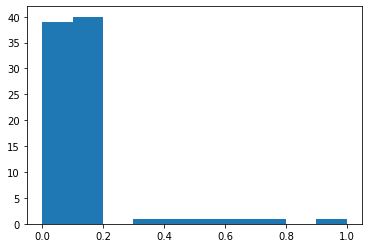

In [91]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

plt.hist(azdias.isna().sum(axis = 0)/ azdias.shape[0])

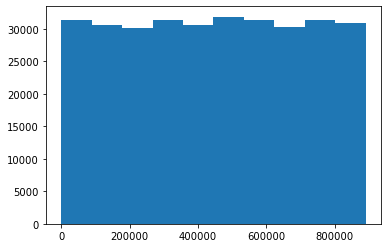

In [92]:
# Assess how the missing data is allocted between the data rows
rows_w_na = []
for column in ['TITEL_KZ', 'AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH']:
    rows_w_na.append(azdias.index[azdias[column].isna()].tolist())
plt.hist(rows_w_na[5]);

It seems there are 6 columns, that have signficantly higher share of missing values (>30% of data rows)

In [93]:
# Investigate patterns in the amount of missing data in each column.

# Calculate share of missing values per column as % of total rows and print top 10
azdias_missing_values = azdias.isnull().sum(axis = 0) / azdias.shape[0]
azdias_missing_values.sort_values(ascending = False).head(10)

TITEL_KZ          0.997576
AGER_TYP          0.769554
KK_KUNDENTYP      0.655967
KBA05_BAUMAX      0.534687
GEBURTSJAHR       0.440203
ALTER_HH          0.348137
REGIOTYP          0.177357
KKK               0.177357
W_KEIT_KIND_HH    0.166051
KBA05_ANTG4       0.149597
dtype: float64

In [94]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Remove top 6 columns; GEBURTSJAHR might be interesting to keep as it correlates with age, however, there is still age category included in columns. 
# TITEL_KZ          0.997576
# AGER_TYP          0.769554
# KK_KUNDENTYP      0.655967
# KBA05_BAUMAX      0.534687
# GEBURTSJAHR       0.440203
# ALTER_HH          0.348137

azdias_columns_removed = azdias.drop(columns = ['TITEL_KZ', 'AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH'])

#### Discussion 1.1.2: Assess Missing Data in Each Column

There were 39 columns with less than ~10% of data missing, 40 with ~10%-20% of data missing, while the remaining 6 columns has signifcantly higher missrate above ~35% or more. The columns were 'TITEL_KZ', 'AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH'. The missing data seemed to scatter across the data rows.

#### Step 1.1.3: Assess Missing Data in Each Row

Similar assessment is performed for the rows of the dataset. How much data is missing in each row? Data is divided into three subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold and third data without any missing values.

In order to know what to do with the outlier rows, distribution of data values on columns is evaluated between the data that is not missing data (or are missing very little data) vs the dataset missing alot data to evaluate if the distributions are similar or different between the two groups.
- Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function is used to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- A function to perform the comparison is put to gether

(array([6.97109e+05, 7.76340e+04, 1.28010e+04, 9.53300e+03, 8.29000e+02,
        1.55000e+02, 1.40160e+04, 5.03100e+03, 2.80380e+04, 4.60750e+04]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

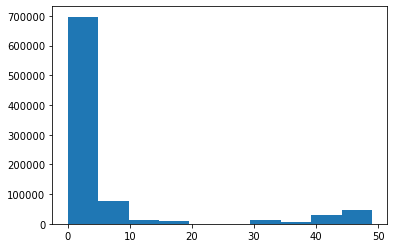

In [95]:
# How much data is missing in each row of the dataset?
plt.hist(azdias_columns_removed.isna().sum(axis = 1))

In [96]:
# Majority of data rows miss <30%/ <20 datapoints, with small amount of rows above the threshold.
# Split data to no, low or high amount NaNs
azdias_low_nan = azdias_columns_removed.loc[azdias_columns_removed.isna().sum(axis = 1) <20]
azdias_high_nan = azdias_columns_removed.loc[azdias_columns_removed.isna().sum(axis = 1) >= 20]
azdias_no_nan = azdias_columns_removed.loc[azdias_columns_removed.isna().sum(axis = 1) == 0]

In [128]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# Calculate basic describtive statistics for each subset
low_stat =azdias_low_nan.describe()
high_stat =azdias_high_nan.describe()
no_stat =azdias_no_nan.describe()


In [98]:
# Analyse the mean and std deviation of the each columns for the three subsets (high, low, no NaNs)
for column in high_stat.columns:
    print(column,'MEAN - High: %.2f'%high_stat[column]['mean'], 'Low: %.2f'%low_stat[column]['mean'], 'No:%.2f'%no_stat[column]['mean'])
    
for column in high_stat.columns:
    print(column,'STD - High: %.2f'%high_stat[column]['std'], 'Low: %.2f'%low_stat[column]['std'], 'No:%.2f'%no_stat[column]['std'])

ALTERSKATEGORIE_GROB MEAN - High: 2.44 Low: 2.80 No:2.79
ANREDE_KZ MEAN - High: 1.53 Low: 1.52 No:1.51
CJT_GESAMTTYP MEAN - High: 4.73 Low: 3.50 No:3.47
FINANZ_MINIMALIST MEAN - High: 3.21 Low: 3.06 No:3.06
FINANZ_SPARER MEAN - High: 3.71 Low: 2.72 No:2.68
FINANZ_VORSORGER MEAN - High: 3.13 Low: 3.43 No:3.45
FINANZ_ANLEGER MEAN - High: 4.66 Low: 2.84 No:2.77
FINANZ_UNAUFFAELLIGER MEAN - High: 4.71 Low: 2.66 No:2.56
FINANZ_HAUSBAUER MEAN - High: 2.73 Low: 3.12 No:3.17
FINANZTYP MEAN - High: 3.72 Low: 3.80 No:3.91
GFK_URLAUBERTYP MEAN - High: 6.33 Low: 7.47 No:7.46
GREEN_AVANTGARDE MEAN - High: 0.00 Low: 0.22 No:0.23
HEALTH_TYP MEAN - High: 1.83 Low: 2.20 No:2.21
LP_LEBENSPHASE_FEIN MEAN - High: 16.68 Low: 16.31 No:16.24
LP_LEBENSPHASE_GROB MEAN - High: 5.09 Low: 4.95 No:4.94
LP_FAMILIE_FEIN MEAN - High: 4.09 Low: 3.91 No:3.96
LP_FAMILIE_GROB MEAN - High: 2.46 Low: 2.38 No:2.39
LP_STATUS_FEIN MEAN - High: 4.80 Low: 4.79 No:4.69
LP_STATUS_GROB MEAN - High: 2.20 Low: 2.46 No:2.43
NATIONALI

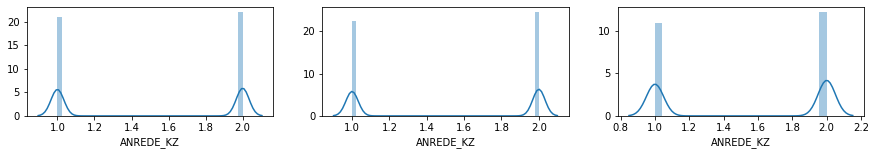

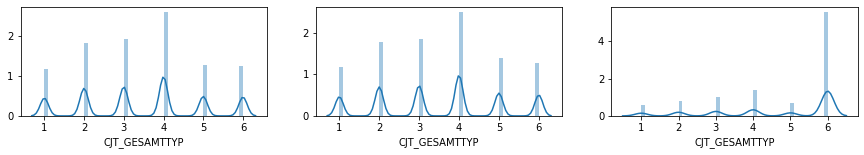

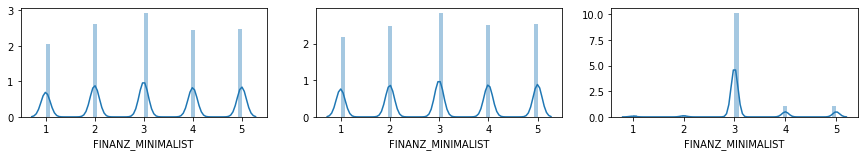

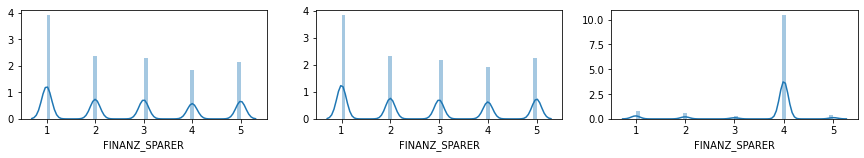

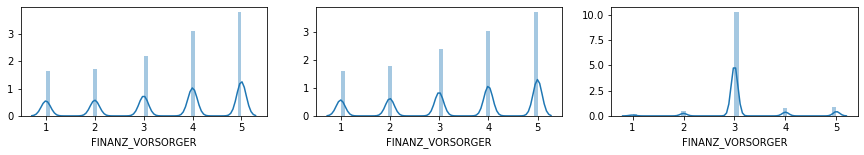

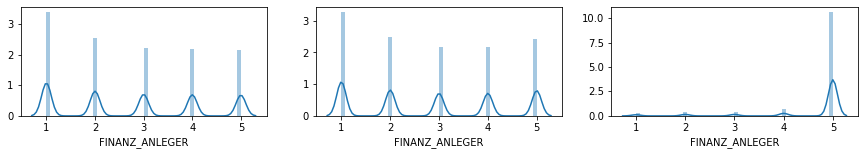

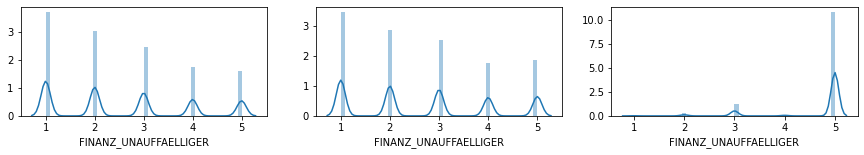

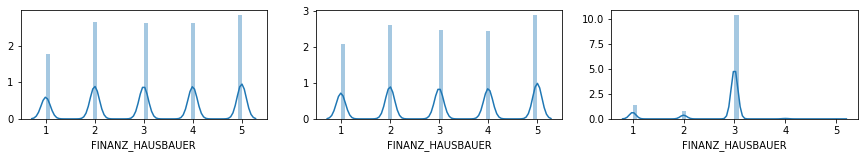

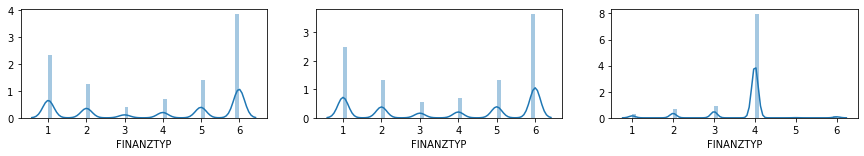

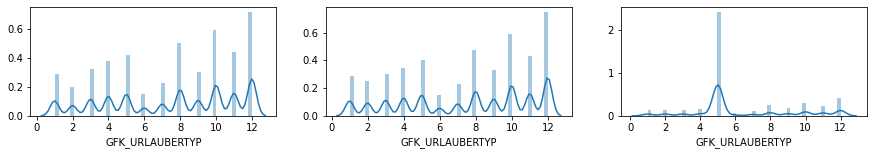

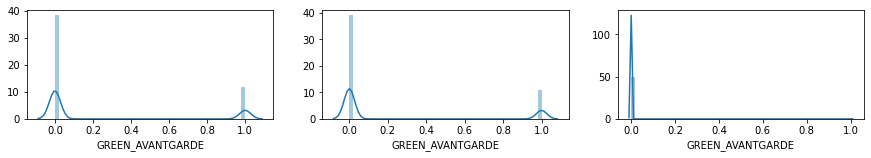

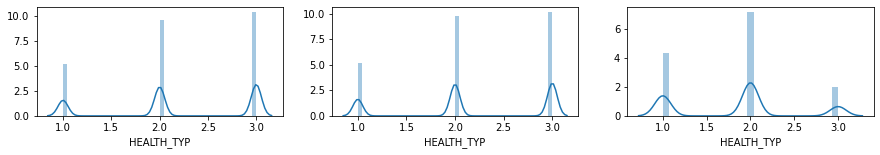

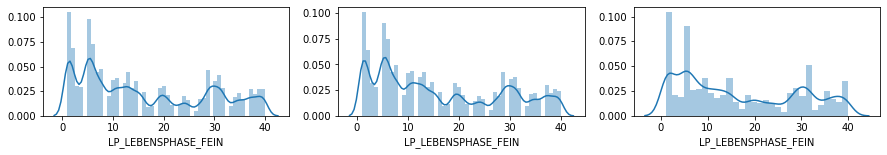

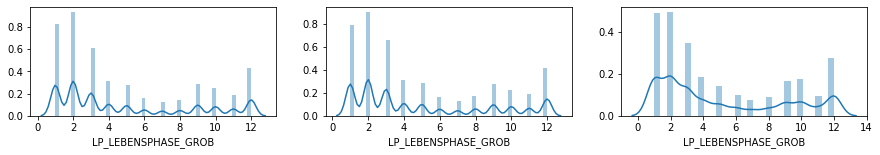

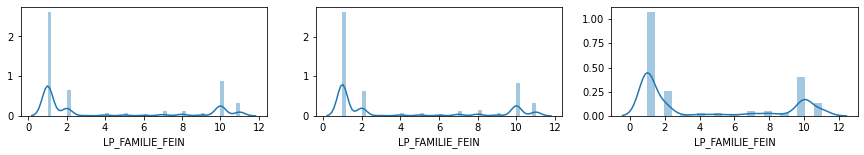

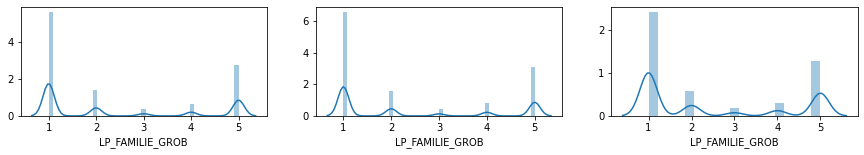

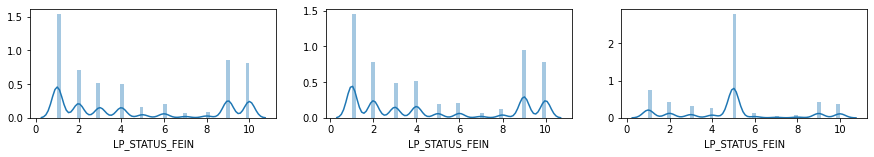

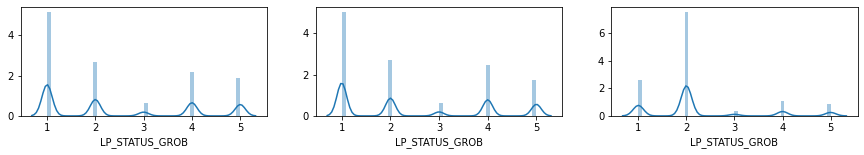

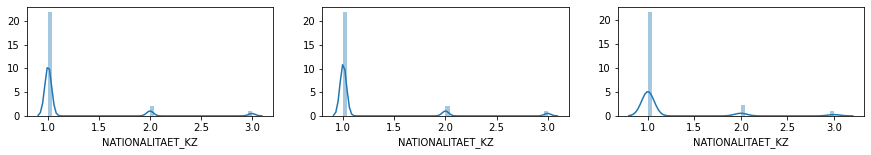

In [99]:
# Plot more detailed distributions of selected columns for no, low and high NaN subsets.
for column in azdias_no_nan.columns[range(1,20)]:
    fig,axs = plt.subplots(ncols = 3, figsize=(15,2))
    sns.distplot(azdias_no_nan[column], ax=axs[0], label='no')
    sns.distplot(azdias_low_nan[column], ax=axs[1], label='low')
    sns.distplot(azdias_high_nan[column], ax=axs[2], label='high')

In [100]:
# Select azdis_no_nan subset for further analysis; no signficant differences between some_nan data in terms of distribution or amount of data. Simplifed the analysis in later phase.
azdias_cleaned = azdias_no_nan
azdias_cleaned.head(5).transpose()

,1,2,4,5,6
ALTERSKATEGORIE_GROB,1,3,3,1,2
ANREDE_KZ,2,2,1,2,2
CJT_GESAMTTYP,5,3,5,2,5
FINANZ_MINIMALIST,1,1,4,3,1
FINANZ_SPARER,5,4,3,1,5
FINANZ_VORSORGER,2,1,4,5,1
FINANZ_ANLEGER,5,2,1,2,5
FINANZ_UNAUFFAELLIGER,4,3,3,2,4
FINANZ_HAUSBAUER,5,5,2,5,3
FINANZTYP,1,1,5,2,4


#### Discussion 1.1.3: Assess Missing Data in Each Row
The basic distribution indicators, mean and std seem to be somewhat similar between high and low or no NaNs subsets, while low and no NaNs appear similar. Overall the there is clear differences between the high NaN and the low or no NaNs subset data distributions across multiple columns. Excluding the high NaN subset may at least reduce certain demographic groups share from the analysis.

### Step 1.2: Select and Re-Encode Features

Data is evaluated to indentify non-numeric columns to conduct re-encoding the features, if non numerical. The third column of the feature summary (`feat_info`) is used to identify for a summary of types of measurement:
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, an investigation of the categorical and mixed-type features in done and decision is made on each of them, whether keep, drop, or re-encode each. Then, in the last part,a new data frame is created with only the selected and engineered columns.


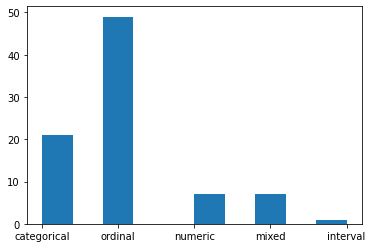

In [88]:
# How many features are there of each data type? (categoricall, ordinal, numeric, mixed, interval)
plt.hist(feat_info.type);

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data one of the following re-encoding is conducted:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), etiher encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. 

In [101]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# Function to evaluate if number is numeric or not
def isnumeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# Collect columns with categorical or mixed values, the unique values of those columns, count of unique values and boolean to indicate if values are non numeric
azdias_encoded_variables = pd.DataFrame(columns = ['column', 'type','unique_values', 'nr_unique_values', 'non_numeric'])

is_numeric_1 = lambda x: map(isnumeric, x)
i = 0 
for column in azdias_cleaned.columns:
    if feat_info[feat_info['attribute'] == column]['type'].item() == 'categorical' or \
    feat_info[feat_info['attribute'] == column]['type'].item() =='mixed':
        azdias_encoded_variables.loc[i] = [
            column, 
            feat_info[feat_info['attribute'] == column]['type'].item(),
            azdias_no_nan[column].unique(),
            azdias_no_nan[column].unique().shape[0],
            (False in list(map(isnumeric,azdias_cleaned[column].unique())))]
        i = i + 1

azdias_encoded_variables

,column,type,unique_values,nr_unique_values,non_numeric
0,ANREDE_KZ,categorical,"[2, 1]",2,False
1,CJT_GESAMTTYP,categorical,"[5.0, 3.0, 2.0, 4.0, 1.0, 6.0]",6,False
2,FINANZTYP,categorical,"[1, 5, 2, 4, 6, 3]",6,False
3,GFK_URLAUBERTYP,categorical,"[10.0, 5.0, 1.0, 12.0, 9.0, 3.0, 8.0, 11.0, 4....",12,False
4,GREEN_AVANTGARDE,categorical,"[0, 1]",2,False
5,LP_LEBENSPHASE_FEIN,mixed,"[21.0, 3.0, 32.0, 8.0, 2.0, 5.0, 10.0, 4.0, 6....",40,False
6,LP_LEBENSPHASE_GROB,mixed,"[6.0, 1.0, 10.0, 2.0, 3.0, 5.0, 7.0, 12.0, 9.0...",12,False
7,LP_FAMILIE_FEIN,categorical,"[5.0, 1.0, 10.0, 2.0, 7.0, 11.0, 8.0, 4.0, 6.0...",11,False
8,LP_FAMILIE_GROB,categorical,"[3.0, 1.0, 5.0, 2.0, 4.0]",5,False
9,LP_STATUS_FEIN,categorical,"[2.0, 3.0, 4.0, 1.0, 10.0, 9.0, 5.0, 6.0, 7.0,...",10,False


In [102]:
# Pick columns that need to be onehotencoded, i.e. if nr. unique values >2 or values are non_numeric
azdias_onehotencoded_variables = azdias_encoded_variables[np.logical_or((azdias_encoded_variables['nr_unique_values'] > 2), (azdias_encoded_variables['non_numeric'] == True))]

azdias_onehotencoded_variables

,column,type,unique_values,nr_unique_values,non_numeric
1,CJT_GESAMTTYP,categorical,"[5.0, 3.0, 2.0, 4.0, 1.0, 6.0]",6,False
2,FINANZTYP,categorical,"[1, 5, 2, 4, 6, 3]",6,False
3,GFK_URLAUBERTYP,categorical,"[10.0, 5.0, 1.0, 12.0, 9.0, 3.0, 8.0, 11.0, 4....",12,False
5,LP_LEBENSPHASE_FEIN,mixed,"[21.0, 3.0, 32.0, 8.0, 2.0, 5.0, 10.0, 4.0, 6....",40,False
6,LP_LEBENSPHASE_GROB,mixed,"[6.0, 1.0, 10.0, 2.0, 3.0, 5.0, 7.0, 12.0, 9.0...",12,False
7,LP_FAMILIE_FEIN,categorical,"[5.0, 1.0, 10.0, 2.0, 7.0, 11.0, 8.0, 4.0, 6.0...",11,False
8,LP_FAMILIE_GROB,categorical,"[3.0, 1.0, 5.0, 2.0, 4.0]",5,False
9,LP_STATUS_FEIN,categorical,"[2.0, 3.0, 4.0, 1.0, 10.0, 9.0, 5.0, 6.0, 7.0,...",10,False
10,LP_STATUS_GROB,categorical,"[1.0, 2.0, 5.0, 4.0, 3.0]",5,False
11,NATIONALITAET_KZ,categorical,"[1.0, 2.0, 3.0]",3,False


In [103]:
# Re-encode categorical variable(s) to be kept in the analysis.

# Select columns to be one-hot econded, drop categorical variables that do not contain all possible unique values GEBAEUDETYP
azdias_onehotencoded_categorial_columns = list(azdias_onehotencoded_variables[azdias_onehotencoded_variables['type']=='categorical'].column)
azdias_onehotencoded_categorial_columns.remove('GEBAEUDETYP')

# One-hot encode the azdias_cleaned data; drop GEBAEUDETYP (do not ontain all possible unique values)
azdias_onehotencoded_categorical =  pd.concat([azdias_cleaned, pd.get_dummies(azdias_cleaned[azdias_onehotencoded_categorial_columns].astype(str), prefix=azdias_onehotencoded_categorial_columns, dummy_na=False)], axis=1).drop(azdias_onehotencoded_categorial_columns,axis=1).drop(columns = ['GEBAEUDETYP'])

# Check encoded feature names
print(list(azdias_onehotencoded_categorical.columns))

['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'CAMEO_INTL_2015', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT'

#### Discussion 1.2.1: Re-Encode Categorical Features

All categorical variables were kept, except one(GEBAEUDETYP; data doesn't contain all category variables, data has 4 categories and 8 potential categories - may create issues if mapping other the data to segmentation based on this data). For the remaining categorical variable one-hot encoding was used to convert the features into binary variables.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that are handled spesifically:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west,  two new variables are created to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).


In [104]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# Defintion of "PRAEGENDE_JUGENDJAHRE" content
# -  1: 40s - war years (Mainstream, E+W)
# -  2: 40s - reconstruction years (Avantgarde, E+W)
# -  3: 50s - economic miracle (Mainstream, E+W)
# -  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
# -  5: 60s - economic miracle (Mainstream, E+W)
# -  6: 60s - generation 68 / student protestors (Avantgarde, W)
# -  7: 60s - opponents to the building of the Wall (Avantgarde, E)
# -  8: 70s - family orientation (Mainstream, E+W)
# -  9: 70s - peace movement (Avantgarde, E+W)
# - 10: 80s - Generation Golf (Mainstream, W)
# - 11: 80s - ecological awareness (Avantgarde, W)
# - 12: 80s - FDJ / communist party youth organisation (Mainstream, E
# - 13: 80s - Swords into ploughshares (Avantgarde, E)
# - 14: 90s - digital media kids (Mainstream, E+W)
# - 15: 90s - ecological awareness (Avantgarde, E+W)

# Define function to convert PRAEGENDE_JUGENDJAHRE to decade coding
def PRAEGENDE_JUGENDJAHRE_decade_coding(num):
    if num in (1, 2):
        return 1.0    # 40s = 1
    elif num in (3, 4):
        return 2.0    # 50s = 2
    elif num in(5, 6, 7):
        return 3.0   # 60s = 3
    elif num in (8, 9):
        return 4.0    # 70s = 4
    elif num in (10, 11, 12, 13):
        return 5.0    # 80s = 5
    elif num in (14, 15):
        return 6.0    # 90s = 6
    else:
        return np.nan

# Define function to convert PRAEGENDE_JUGENDJAHRE to movment coding
def PRAEGENDE_JUGENDJAHRE_movment_coding(num):
    if num in (1, 3, 5, 8, 10, 12, 14):
        return 1.0    # Mainstream = 1
    elif num in (2, 4, 6, 7, 9, 11, 13, 15):
        return 2.0    # Avantgarde = 2
    else:
        return np.nan

# Calcluate new categories for decade and movment based on PRAEGENDE_JUGENDJAHRE and copy result to azdias_onhotencoded_categorical_mixed, drop PRAEGENDE_JUGENDJAHRE from the final result
azdias_onehotencoded_categorical_mixed = azdias_onehotencoded_categorical.drop(columns = ['PRAEGENDE_JUGENDJAHRE'])

azdias_onehotencoded_categorical_mixed['PRAEGENDE_JUGENDJAHRE_decade'] = azdias_onehotencoded_categorical['PRAEGENDE_JUGENDJAHRE'].apply(PRAEGENDE_JUGENDJAHRE_decade_coding)

azdias_onehotencoded_categorical_mixed['PRAEGENDE_JUGENDJAHRE_movment'] = azdias_onehotencoded_categorical['PRAEGENDE_JUGENDJAHRE'].apply(PRAEGENDE_JUGENDJAHRE_movment_coding)


In [106]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

# Defintion of "CAMEO_INTL_2015" content
# - 11: Wealthy Households - Pre-Family Couples & Singles
# - 12: Wealthy Households - Young Couples With Children
# - 13: Wealthy Households - Families With School Age Children
# - 14: Wealthy Households - Older Families &  Mature Couples
# - 15: Wealthy Households - Elders In Retirement
# - 21: Prosperous Households - Pre-Family Couples & Singles
# - 22: Prosperous Households - Young Couples With Children
# - 23: Prosperous Households - Families With School Age Children
# - 24: Prosperous Households - Older Families & Mature Couples
# - 25: Prosperous Households - Elders In Retirement
# - 31: Comfortable Households - Pre-Family Couples & Singles
# - 32: Comfortable Households - Young Couples With Children
# - 33: Comfortable Households - Families With School Age Children
# - 34: Comfortable Households - Older Families & Mature Couples
# - 35: Comfortable Households - Elders In Retirement
# - 41: Less Affluent Households - Pre-Family Couples & Singles
# - 42: Less Affluent Households - Young Couples With Children
# - 43: Less Affluent Households - Families With School Age Children
# - 44: Less Affluent Households - Older Families & Mature Couples
# - 45: Less Affluent Households - Elders In Retirement
# - 51: Poorer Households - Pre-Family Couples & Singles
# - 52: Poorer Households - Young Couples With Children
# - 53: Poorer Households - Families With School Age Children
# - 54: Poorer Households - Older Families & Mature Couples
# - 55: Poorer Households - Elders In Retirement

# print(azdias_onhotencoded_categorical['CAMEO_INTL_2015'].unique())
# print(azdias_cleaned['CAMEO_DEUG_2015'].unique())

def CAMEO_INTL_2015_wealth_coding(num):
    if num in [np.nan]:
        return np.nan
    else:
        return (int(num[0]))   # Take the first digit

def CAMEO_INTL_2015_lifestage_coding(num):
    if num in [np.nan]:
        return np.nan
    else:
       return (int(num[1])) # Take the last digit

azdias_onehotencoded_categorical_mixed['CAMEO_INTL_2015_wealth'] = azdias_onehotencoded_categorical['CAMEO_INTL_2015'].apply(CAMEO_INTL_2015_wealth_coding)

azdias_onehotencoded_categorical_mixed['CAMEO_INTL_2015_lifestage'] = azdias_onehotencoded_categorical['CAMEO_INTL_2015'].apply(CAMEO_INTL_2015_lifestage_coding)

azdias_onehotencoded_categorical_mixed = azdias_onehotencoded_categorical_mixed.drop(columns = ['CAMEO_INTL_2015'])

print(list(azdias_onehotencoded_categorical_mixed.columns))

['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE', 'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'WOHNLAGE', 'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX', 'PLZ8_HHZ', 'PLZ8_GBZ', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB', 'CJT_GESAMTTYP_

In [107]:
# Drop some of the mixed type features as they mostly overlap with existing data:
# LP_LEBENSPHASE_FEIN: life_Stage, financial stage -> life stage and wealth captured in CAMEO_INTL_2015  
# LP_LEBENSPHASE_GROB: Life stage, rough scale > life stage and wealth captured in CAMEO_INTL_2015  
# PLZ8_BAUMAX Most common building type within the PLZ8 region -> similar to PLZ8_ANTG features in the data
azdias_onehotencoded_categorical_mixed =azdias_onehotencoded_categorical_mixed.drop(columns = ['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX'])

# Keep WOHNLAGE as is - for simplicity keep numerical representation like for other mixed type variables
print(azdias_onehotencoded_categorical_mixed['WOHNLAGE'].unique())

[4. 2. 3. 7. 5. 1. 8. 0.]


#### Discussion 1.2.2: Engineer Mixed-Type Features
Following multidimensional mixed-type features were split to multiple new feature variables:
- "PRAEGENDE_JUGENDJAHRE": split to "PRAEGENDE_JUGENDJAHRE_decade" and "PRAEGENDE_JUGENDJAHRE_movent"
- "CAMEO_INTL_2015": split to "CAMEO_INTL_2015_wealth" and ""CAMEO_INTL_2015_lifestage"

Four other mixed-type features were dropped, as the data content is at least partially captured in other data features:
- LP_LEBENSPHASE_FEIN: life_Stage, financial stage -> life stage and wealth captured in CAMEO_INTL_2015  
- LP_LEBENSPHASE_GROB: Life stage, rough scale > life stage and wealth captured in CAMEO_INTL_2015  
- PLZ8_BAUMAX: Most common building type within the PLZ8 region -> similar to PLZ8_ANTG features in the data

One mixed-type variable was kept as is:
- WOHNLAGE: for simplicity keep numerical representation like for other mixed type variables

#### Step 1.2.3: Complete Feature Selection

After the featrure selection, the dataframe sconsist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.


In [108]:
# Copy encoded and re-engineered dataframe to azdias_ecoded_final and check that all the data is numerical and ready for further steps
azdias_encoded_final = pd.DataFrame.copy(azdias_onehotencoded_categorical_mixed)
azdias_encoded_final_summary = pd.DataFrame(columns = ['column', 'unique_values', 'nr_unique_values', 'non_numeric'])
i = 0
for column in azdias_onehotencoded_categorical_mixed.columns:
        azdias_encoded_final_summary.loc[i] = [
            column, 
            azdias_encoded_final[column].unique(),
            azdias_encoded_final[column].unique().shape[0],
            (False in list(map(isnumeric,azdias_encoded_final[column].unique())))]
        i = i + 1

azdias_encoded_final_summary

,column,unique_values,nr_unique_values,non_numeric
0,ALTERSKATEGORIE_GROB,"[1.0, 3.0, 2.0, 4.0]",4,False
1,ANREDE_KZ,"[2, 1]",2,False
2,FINANZ_MINIMALIST,"[1, 4, 3, 2, 5]",5,False
3,FINANZ_SPARER,"[5, 4, 3, 1, 2]",5,False
4,FINANZ_VORSORGER,"[2, 1, 4, 5, 3]",5,False
5,FINANZ_ANLEGER,"[5, 2, 1, 4, 3]",5,False
6,FINANZ_UNAUFFAELLIGER,"[4, 3, 2, 5, 1]",5,False
7,FINANZ_HAUSBAUER,"[5, 2, 3, 4, 1]",5,False
8,GREEN_AVANTGARDE,"[0, 1]",2,False
9,HEALTH_TYP,"[3.0, 2.0, 1.0]",3,False


### Step 1.3: Create a Cleaning Function

A complete data cleansing function is put together to execute the main feature selection, encoding, and re-engineering steps performed above to easen the pre-processing phase of the data.

In [109]:
# Function to clean the demographics data (feature trimming, re-encoding, and engineering)
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    # Identify missing or unknown data values and convert them to NaNs.

    # Load in the feature summary file.
    feat_info = pd.read_csv('./AZDIAS_Feature_Summary.csv', sep=';')
    
    # Create output dataframe and print its original shape
    df_cleaned = df.copy()
    print("Dataframe original shape:", df_cleaned.shape)

    # Iterate over all the columns in azdias, identify 'missing' or 'unkown' code based on feat_info data and replace data to NaN
    for column in df.columns:
        
        # Iterate for missing_or_unkown codes in feat_info for iterated column, and replace azdias data with NaN if code identified in data 
        for nan_item in feat_info[feat_info['attribute'] == column]['missing_or_unknown'].item().replace('[','').replace(']','').split(','): 
            if nan_item == '':
                #print(column, nan_item,' empty')
                continue
            elif nan_item == 'X' or nan_item == 'XX':
                # Replace string coding (X or XX) with NaN
                #print(column, nan_item,' string', ' replaced: ',np.sum(df_cleaned[column] == nan_item))
                df_cleaned[column].replace(nan_item, np.nan, inplace=True)       
            else:
                # Replace numerical coding (-1, 0, 9) with NaN
                #print(column, int(nan_item),' num', ' replaced: ',np.sum(df_cleaned[column] == int(nan_item)) )
                df_cleaned[column].replace(int(nan_item), np.nan, inplace=True)    
    print("Total number of non-nans in dataframe:",df_cleaned.count().sum(axis = 0).sum(), "Total number of NaNs in dataframe: ", df_cleaned.isna().sum(axis = 0).sum())

    # Remove selected columns and rows
    # Remove columns with large share of NaNs and other columns that are decided to be dropped and not to use in the analysis
    columns_to_drop = ['TITEL_KZ', 'AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR','ALTER_HH', 'GEBAEUDETYP','LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX']
    df_cleaned.drop(columns = columns_to_drop, inplace=True)
    print("Dropped columns ", columns_to_drop)

    # Remove rows with NaNs
    df_cleaned = df_cleaned.loc[df_cleaned.isna().sum(axis = 1) == 0]
    print("Dataframe shape after removing columns with high share of NaNs and row with any NaNs:", df_cleaned.shape)

    #################################################################################################################
    # select, re-encode, and engineer column values.

    #################################################################################################################
    # Prepare for encoding and engineering column values; Identify Categorical and Mixed variables for re-engineering
    def isnumeric(s):
        try:
            float(s)
            return True
        except ValueError:
            return False

    # Collect columns with categorical or mixed values, the unique values of those columns, count of unique values and boolean to indicate if values are non numeric
    df_encoded_variables = pd.DataFrame(columns = ['column', 'type','unique_values', 'nr_unique_values', 'non_numeric'])

    is_numeric_1 = lambda x: map(isnumeric, x)
    i = 0 
    for column in df_cleaned.columns:
        if feat_info[feat_info['attribute'] == column]['type'].item() == 'categorical' or \
        feat_info[feat_info['attribute'] == column]['type'].item() =='mixed':
            df_encoded_variables.loc[i] = [
                column, 
                feat_info[feat_info['attribute'] == column]['type'].item(),
                df_cleaned[column].unique(),
                df_cleaned[column].unique().shape[0],
                (False in list(map(isnumeric,df_cleaned[column].unique())))]
            i = i + 1
    
    # Pick columns that need to be onehotencoded, i.e. if nr. unique values >2 or values are non_numeric
    df_onehotencoded_variables = df_encoded_variables[np.logical_or((df_encoded_variables['nr_unique_values'] > 2), (df_encoded_variables['non_numeric'] == True))]

    ###############################################################################################################    
    # one-hot encode categorical variable(s) to be kept in the analysis.

    # Select columns to be one-hot econded
    df_onehotencoded_categorial_columns = list(df_onehotencoded_variables[df_onehotencoded_variables['type']=='categorical'].column)

    # One-hot encode the azdias_cleaned data
    df_cleaned =  pd.concat([df_cleaned, pd.get_dummies(df_cleaned[df_onehotencoded_categorial_columns].astype(str), prefix=df_onehotencoded_categorial_columns, dummy_na=False)], axis=1).drop(df_onehotencoded_categorial_columns,axis=1)

    ###############################################################################################################
    #Re-engineer two mixed variables PRAEGENDE_JUGENDJAHRE

    # Define function to convert PRAEGENDE_JUGENDJAHRE to decade coding
    def PRAEGENDE_JUGENDJAHRE_decade_coding(num):
        if num in (1, 2):
            return 1    # 40s = 1
        elif num in (3, 4):
            return 2    # 50s = 2
        elif num in(5, 6, 7):
            return 3   # 60s = 3
        elif num in (8, 9):
            return 4    # 70s = 4
        elif num in (10, 11, 12, 13):
            return 5    # 80s = 5
        elif num in (14, 15):
            return 6    # 90s = 6
        else:
            return np.nan

    # Define function to convert PRAEGENDE_JUGENDJAHRE to movment coding
    def PRAEGENDE_JUGENDJAHRE_movment_coding(num):
        if num in (1, 3, 5, 8, 10, 12, 14):
            return 1    # Mainstream = 1
        elif num in (2, 4, 6, 7, 9, 11, 13, 15):
            return 2    # Avantgarde = 2
        else:
            return np.nan

    # Calcluate new categories for decade and movment based on PRAEGENDE_JUGENDJAHRE value and copy result to df_cleaned, drop PRAEGENDE_JUGENDJAHRE from the final result
    df_cleaned['PRAEGENDE_JUGENDJAHRE_decade'] = df_cleaned['PRAEGENDE_JUGENDJAHRE'].apply(PRAEGENDE_JUGENDJAHRE_decade_coding)
    df_cleaned['PRAEGENDE_JUGENDJAHRE_movment'] = df_cleaned['PRAEGENDE_JUGENDJAHRE'].apply(PRAEGENDE_JUGENDJAHRE_movment_coding)
    df_cleaned = df_cleaned.drop(columns = ['PRAEGENDE_JUGENDJAHRE'])



    ################################################################################################################
    #Re-engineer two mixed variables CAMEO_INTL_2015
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.

    # Define function to convert CAMEO_INTL_2015 to wealth category
    def CAMEO_INTL_2015_wealth_coding(num):
        if num in [np.nan]:
            return np.nan
        else:
            return (int(num[0]))   # Take the first digit
    
    # Define function to convert CAMEO_INTL_2015 to lifestage category
    def CAMEO_INTL_2015_lifestage_coding(num):
        if num in [np.nan]:
            return np.nan
        else:
            return (int(num[1])) # Take the last digit

    # Calcluate new categories for wealth and lifestage based on CAMEO_INTL_2015 value and copy result to df_cleaned, drop CAMEO_INTL_2015 from the final result
    df_cleaned['CAMEO_INTL_2015_wealth'] = df_cleaned['CAMEO_INTL_2015'].apply(CAMEO_INTL_2015_wealth_coding)
    df_cleaned['CAMEO_INTL_2015_lifestage'] = df_cleaned['CAMEO_INTL_2015'].apply(CAMEO_INTL_2015_lifestage_coding)
    df_cleaned = df_cleaned.drop(columns = ['CAMEO_INTL_2015'])

    print("Dataframe shape after removing high NaN columns and rows, transforming categorical variables and re-engineering mixed type variables:", df_cleaned.shape)

    # Return the cleaned dataframe.
    return df_cleaned

In [110]:
# Clean Azdias data using the clean_data function for further processing
azdias_cleaned = clean_data(azdias)

Dataframe original shape: (891221, 85)
Total number of non-nans in dataframe: 67379856 Total number of NaNs in dataframe:  8373929
Dropped columns  ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH', 'GEBAEUDETYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX']
Dataframe shape after removing columns with high share of NaNs and row with any NaNs: (623211, 75)
Dataframe shape after removing high NaN columns and rows, transforming categorical variables and re-engineering mixed type variables: (623211, 187)


In [112]:
azdias_cleaned

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_decade,PRAEGENDE_JUGENDJAHRE_movment,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_lifestage
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,0,0,0,0,0,6,1,5,1
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,0,0,0,0,0,6,2,2,4
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,0,0,0,0,4,1,4,3
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,0,0,0,0,0,2,1,5,4
6,2.0,2,1,5,1,5,4,3,0,2.0,...,0,0,0,0,0,0,5,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891213,4.0,2,3,3,3,5,3,2,1,1.0,...,0,0,0,0,0,0,5,2,3,4
891214,1.0,2,1,5,2,3,3,4,0,3.0,...,0,0,0,0,0,0,6,1,2,3
891215,2.0,2,1,5,2,4,5,4,0,2.0,...,0,0,0,0,0,0,5,1,3,1
891219,1.0,1,1,5,3,5,5,5,0,1.0,...,0,0,0,0,1,0,6,1,5,1


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before applying dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. In this substep, the following steps are conducted:

- For the scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is used, scaling each feature to mean 0 and standard deviation 1.
- For these classes, `.fit_transform()` method is used to both fit a procedure to the data as well as apply the transformation to the data at the same time.

In [113]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
azdias_cleaned_ss = scaler.fit_transform(azdias_cleaned)

### Step 2.2: Perform Dimensionality Reduction

On the scaled data, dimensionality reduction techniques are applied.

- sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class is used to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data.
- The ratio of variance explained by each principal component as well as the cumulative variance explained is mapped and plotted using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on insight, the number of transformed features to be retained for the clustering part of the project is determined.

In [114]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Fit azdias cleaned data and scaled data to PCA
pca = PCA()
azdias_pca = pca.fit_transform(azdias_cleaned_ss)


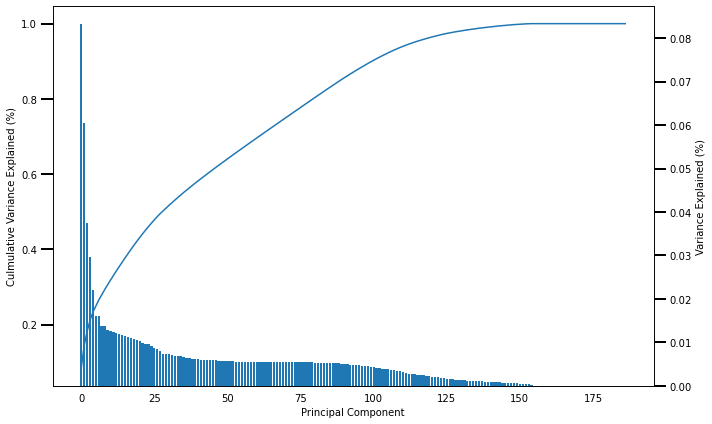

In [115]:
# Investigate the variance accounted for by each principal component.
def plot_pca_variance(pca):
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    cumvals = np.cumsum(vals)

    fig,ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(ind, cumvals)
    ax1.xaxis.set_tick_params(width=0)
    ax1.yaxis.set_tick_params(width=2, length=12)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Culmulative Variance Explained (%)")

    ax2 = ax1.twinx()
    ax2.bar(ind, vals)
    ax2.yaxis.set_tick_params(width=2, length=12)
    ax2.set_ylabel("Variance Explained (%)")

    fig.tight_layout()
    plt.show()
    
plot_pca_variance(pca)


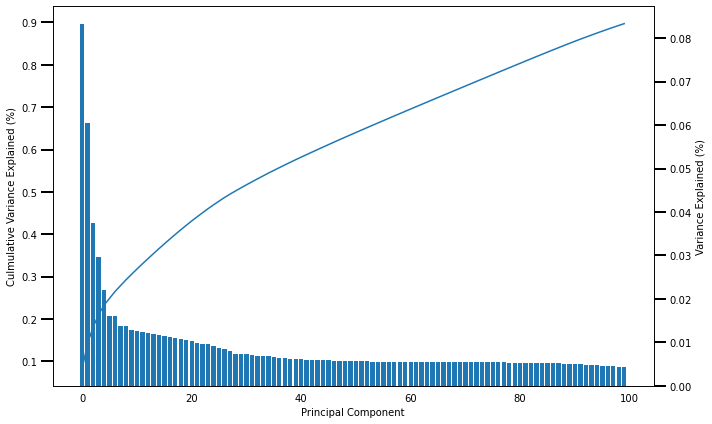

In [118]:
# Re-apply PCA to the data while selecting for number of components to retain.

# Pick the 100 componenets out of 186, that explain most most of the variance (~80%) and re-calculate PCA

# Fit azdias cleaned data and scaled data to PCA
pca_final = PCA(n_components=100)
azdias_pca = pca_final.fit_transform(azdias_cleaned_ss)

azdias_pca_final = pd.DataFrame(azdias_pca)
plot_pca_variance(pca_final)



### Discussion 2.2: Perform Dimensionality Reduction

There is a few clear variance drop-off points in data:
- After first ~10 components, which explain cumulatively ~30% of variance
- After first ~30 components, which explain cumulatively ~50% of variance
- After first ~100 components, which explain cumulatively ~90% of variance

100 components/features (out of 186 originally) where retained as they are explaining majority of the variance, while being able to drop 86 features. Potentially less features could work for segmentation purposes, but for sake of certainty features explaining higher shaer of variance are kept.

### Step 2.3: Interpret Principal Components

The first 4 principal components are evaluated in more detail to check out the weight of each variable on the components to see if they can be interpreted.

- To investigate the features, each weight is mapped to their corresponding feature name, then sorting the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. The data dictionary document is used to interpret the most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- To help facilitate this, a function is written to print the sorted list of feature weights, for the *i*-th principal component. 

In [12]:
# Function to consolidate the feature weights for i_component of PCA component
def pca_results_component(dataset, pca, i_component):
    # Dimension indexing
    dimensions = [i for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 3), columns = dataset.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 3), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    merged_pca_data = pd.concat([variance_ratios, components], axis = 1)

    # Return a concatenated DataFrame i_component, sorted
    return merged_pca_data.iloc[i_component].sort_values(ascending = False)

In [119]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
print(pca_results_component(azdias_cleaned,pca_final,0).head(10))
print(pca_results_component(azdias_cleaned,pca_final,0).tail(10))

# 1st PCA component correlate positively with low income, high value indicating poorer households, high score indicating low income, larger family houses in region, size of community large, high density of households, low share of house owner and money-savers) and _negatively_ on low movment, high on low financial interest, high share of 1-2 family houses in region, number of building in region, long distance to city center, social status top earners

LP_STATUS_GROB_1.0        0.194
CAMEO_INTL_2015_wealth    0.181
HH_EINKOMMEN_SCORE        0.181
PLZ8_ANTG3                0.177
PLZ8_ANTG4                0.171
ORTSGR_KLS9               0.149
EWDICHTE                  0.146
FINANZ_HAUSBAUER          0.137
FINANZ_SPARER             0.131
LP_STATUS_FEIN_1.0        0.125
Name: 1, dtype: float64
LP_STATUS_GROB_5.0    -0.122
LP_STATUS_FEIN_10.0   -0.122
INNENSTADT            -0.123
KONSUMNAEHE           -0.128
PLZ8_GBZ              -0.133
PLZ8_ANTG1            -0.179
KBA05_GBZ             -0.179
KBA05_ANTG1           -0.190
FINANZ_MINIMALIST     -0.195
MOBI_REGIO            -0.202
Name: 1, dtype: float64


In [120]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print(pca_results_component(azdias_cleaned,pca_final,1).head(10))
print(pca_results_component(azdias_cleaned,pca_final,1).tail(10))

# 2nd PCA component correlate positively with old age, very low on financially prepared, fair supplied energy consumption, low affinity of event oriented personality, determined minimal retuner, low affinity of sensual minded personality, high likelihood of no children in household, typical low-income earners, low on home ownership and negatively on persons youth on 90s,  high online affinity, low affinity to rational, cultural and traditional minded, religious, dutiful personal typology, low financial investors, low inconspicious and money saver 


ALTERSKATEGORIE_GROB    0.227
FINANZ_VORSORGER        0.205
ZABEOTYP_3              0.199
SEMIO_ERL               0.182
RETOURTYP_BK_S          0.156
SEMIO_LUST              0.156
W_KEIT_KIND_HH          0.129
LP_STATUS_FEIN_1.0      0.107
CJT_GESAMTTYP_2.0       0.100
FINANZ_HAUSBAUER        0.098
Name: 2, dtype: float64
ONLINE_AFFINITAET              -0.162
SEMIO_RAT                      -0.162
SEMIO_KULT                     -0.165
FINANZ_ANLEGER                 -0.194
SEMIO_TRADV                    -0.203
FINANZ_UNAUFFAELLIGER          -0.207
SEMIO_PFLICHT                  -0.207
FINANZ_SPARER                  -0.213
SEMIO_REL                      -0.215
PRAEGENDE_JUGENDJAHRE_decade   -0.229
Name: 2, dtype: float64


In [121]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print(pca_results_component(azdias_cleaned,pca_final,2).head(10))
print(pca_results_component(azdias_cleaned,pca_final,2).tail(10))

#3rd PCA component correlate positively with high affinity of dreamful, familyminded, socially minded, kultural, religious minided personality type, investor and low financial interest financial type, external supplied hedonists shopper type, green energy type and negatively on female,  combative attitude, dominant-minded, critical minded, event-oriented, rational personality type, investor financial type, family shopper type, low financial interest


SEMIO_VERT                       0.318
SEMIO_FAM                        0.256
SEMIO_SOZ                        0.254
SEMIO_KULT                       0.242
FINANZTYP_5                      0.142
FINANZ_MINIMALIST                0.128
SHOPPER_TYP_0.0                  0.125
ZABEOTYP_1                       0.120
SEMIO_REL                        0.117
PRAEGENDE_JUGENDJAHRE_movment    0.088
Name: 3, dtype: float64
LP_STATUS_FEIN_4.0   -0.082
FINANZTYP_1          -0.095
SHOPPER_TYP_2.0      -0.106
SEMIO_RAT            -0.155
FINANZ_ANLEGER       -0.158
SEMIO_ERL            -0.199
SEMIO_KRIT           -0.258
SEMIO_DOM            -0.275
SEMIO_KAEM           -0.308
ANREDE_KZ            -0.339
Name: 3, dtype: float64


In [122]:
# Map weights for the fourth principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print(pca_results_component(azdias_cleaned,pca_final,3).head(10))
print(pca_results_component(azdias_cleaned,pca_final,3).tail(10))

#4th PCA component Correlates positively with avantgarde movement type in youth, top earners, urban area living, upper class and negatively on rural or very poort or poor neightborhood, being houseowner, long distance to urban / city center, low or very low income, low purchase power

PRAEGENDE_JUGENDJAHRE_movment    0.274
GREEN_AVANTGARDE                 0.274
LP_STATUS_FEIN_10.0              0.224
LP_STATUS_GROB_5.0               0.224
EWDICHTE                         0.212
ORTSGR_KLS9                      0.208
SEMIO_DOM                        0.146
SEMIO_KAEM                       0.135
ANZ_PERSONEN                     0.116
CAMEO_DEUG_2015_1                0.115
Name: 4, dtype: float64
LP_FAMILIE_GROB_1.0   -0.126
LP_FAMILIE_FEIN_1.0   -0.126
LP_STATUS_FEIN_4.0    -0.137
KKK                   -0.158
INNENSTADT            -0.165
HH_EINKOMMEN_SCORE    -0.165
BALLRAUM              -0.171
LP_STATUS_FEIN_9.0    -0.184
LP_STATUS_GROB_4.0    -0.191
WOHNLAGE              -0.221
Name: 4, dtype: float64


### Discussion 2.3: Interpret Principal Components

1st PCA component correlate with low income person (postively on low income, wealth related features and negatively on factor indicating high income / wealth)

2nd PCA component correlate with elderly persons with no kids in household, with lower income

3rd PCA component correlate with male, faimly oriented, dreamful, kultural and religious personality type, however, the features dont create very clear pattern

4th PCA components correlates with high income persons (avantgarde movement type in youth, top earners, urban area living, upper class and negatively on rural or poor neightborhood, being houseowner, long distance to urban / city center, low or very low income, low purchase power)

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

In this substep, k-means clustering is applied to the dataset and the average within-cluster distances from each point to their assigned cluster's centroid is used to decide on a number of clusters to keep.

- sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class is used to perform k-means clustering on the PCA-transformed data. Then, the average difference from each point to its assigned cluster's center is used (using Kmeans score function).
- The above is performed for a number of different cluster counts (2-20). The optimal cluster count is determined based on the shoulder point of the error curve, where the marginal reduction in the error function starts to decline linearily with the increase in number of clusters
- Once the final number of clusters is defined, a KMeans instance is refitted to perform the clustering operation. 

In [20]:
from sklearn.cluster import KMeans

# Over a number of different cluster counts...
max_cluster = 20
scores =[]

for n in range(1,max_cluster):
    # run k-means clustering on the data and...
    kmeans_fit = KMeans(n_clusters = n, random_state=0).fit(azdias_pca_final)

    # compute the average within-cluster distances. Use 10% sample from the data to calculate the score
    scores.append(-kmeans_fit.score(azdias_pca_final.sample(frac=0.1)))
    print("score:", scores[n-1])
    

score: 10439895.655313745
score: 9710226.495250579
score: 9329722.593810493
score: 9135436.928084465
score: 8927705.381738268
score: 8794848.7699683
score: 8699002.857585158
score: 8622705.136151034
score: 8508123.120461311
score: 8437986.849576738
score: 8352172.259509108
score: 8268074.324037115
score: 8261086.503664598
score: 8174092.323042699
score: 8133788.433012106
score: 8078205.230882297
score: 8032594.497609956
score: 8003540.298021749
score: 7936048.231490365


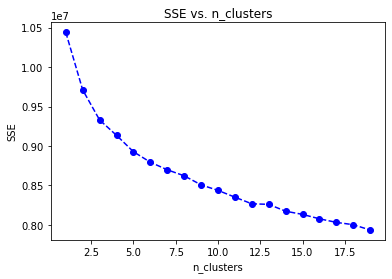

In [21]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
centers = range(1,max_cluster)

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('n_clusters');
plt.ylabel('SSE');
plt.title('SSE vs. n_clusters');


In [123]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# Avg distance errror curve have shoulde poin at ~6 clusters after which the error decreases linearnly with new clusters; 6 clusters is chosen for final assessment

kmeans_fit_final = KMeans(n_clusters = 6, random_state=0).fit(azdias_pca_final)
azdias_clustering = pd.DataFrame(data = kmeans_fit_final.predict(azdias_pca_final), columns = ['segment'])

### Discussion 3.1: Apply Clustering to General Population

Scaled and PCA dimension reduced Azdis dataset was clustered using kmeans clustering with number of clusters varying between 1-20. The error function (avg. distance to cluster centroid) was calculated and the final clustering number 6 was selected based on the error curve shoulder point, i.e. where the marginal reduction of the error started declining linearly with every new cluster added.  

### Step 3.2: Apply All Steps to the Customer Data

Customer data is clustered using the demographic data clustering model:
- the cleansing function is first applied to customer data (to apply all the necessary preprocessing, cleansing and feature transormations to the data)
- the sklearn objects from the general demographics data, including the feature scaling, PCA transformations and clustering are applied to the customers data to obtaining clustering for all of the data in the customer demographics data.

In [23]:
# Load in the customer demographics data.
customers = pd.read_csv('./Udacity_CUSTOMERS_Subset.csv', sep=';')

In [24]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# Clean the customer data (preprocessing and feature transformation)
customers_cleaned = clean_data(customers)

Dataframe original shape: (191652, 85)
Total number of non-nans in dataframe: 13177502 Total number of NaNs in dataframe:  3112918
Dropped columns  ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH', 'GEBAEUDETYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX']
Dataframe shape after removing columns with high share of NaNs and row with any NaNs: (115643, 75)
Dataframe shape after removing high NaN columns and rows, transforming categorical variables and re-engineering mixed type variables: (115643, 187)


In [28]:
# Scale data to uniform variance
customers_cleaned_ss = scaler.transform(customers_cleaned)

In [29]:
# Conduct dimension reduction using PCA with 100 components
customers_cleaned_ss_pca = pca_final.transform(customers_cleaned_ss)

In [50]:
# Cluster data based on demographics data clustering model
customers_clustering = pd.DataFrame(data = kmeans_fit_final.predict(customers_cleaned_ss_pca), columns = ['segment'])

### Step 3.3: Compare Customer Data to Demographics Data

At this point, customer data is clustered data based on demographics of the general population of Germany, and how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, the two cluster distributions are compared to see where the strongest customer base for the company is.

Following steps are conducted:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations the individual dataset proportions and the ratios in cluster representation between groups using Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html).
- Asses which cluster or clusters are overrepresented in the customer dataset compared to the general population and infer what kind of people might be represented by that cluster. (Use the principal component interpretations from step 2.3
- Perform a similar investigation for the underrepresented clusters to determine which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters.

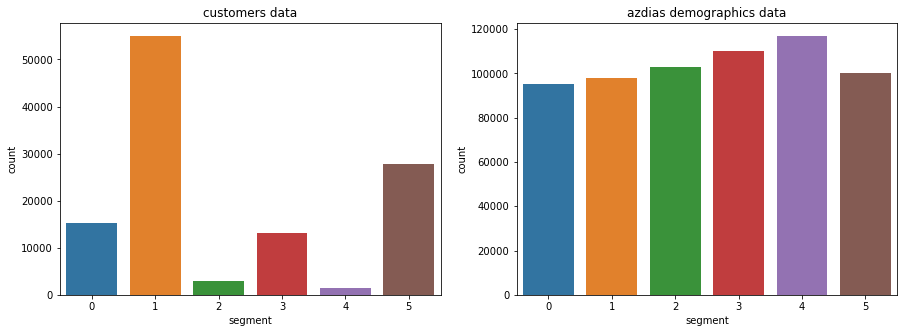

In [126]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
fig,axs = plt.subplots(ncols = 2, figsize=(15,5))
axs[0].set_title('customers data')
axs[1].set_title('azdias demographics data')
sns.countplot(x = 'segment', data=customers_clustering, ax=axs[0]);
sns.countplot(x = 'segment', data=azdias_clustering, ax=axs[1]);

# Cluster/segment 1 is overrepresented in the customers data and cluster/segment 4 is clearly underrepresented compared to azdias demographic data

In [127]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
kmeans_fit_final.cluster_centers_[1].round(0)

# Segment 1 clustering centroid has high negtive weight on PCA component 1 (-5) and high postive weight on PCA component 4 (3), while the remaining are close to 0 or 1 /-1. The PCA component 1 correlates with low income persons, and PCA component 4 with top earning urban people.


array([-5.,  0.,  1.,  3., -0.,  1., -0., -1.,  0., -0., -0., -0.,  0.,
        0.,  0., -0., -0.,  0., -1., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,
       -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,
        0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,
        0.,  0., -0., -0., -0., -0.,  0.,  0., -0.])

In [79]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
kmeans_fit_final.cluster_centers_[4].round(0)

# Segment 4 clustering centroid has high positive weight on PCA component 1 (5) and negative weight on PCA component 2 (-2), while the remaining are close to 0 or 1 /-1. The PCA component 1 correlates with low income persons, and PCA component 2 with elderly people living with kids

array([ 5., -2., -0.,  0., -0.,  0., -0., -1.,  0.,  0.,  0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,
       -0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,
       -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,
        0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,
       -0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.])

### Discussion 3.3: Compare Customer Data to Demographics Data

Mail order company primary customer group (overrepresented compared to demographic average segment size) is top earners living in cities, avantgarde movment dominating in their youth, non-home owners living in large urban centers or cities. 

Relatively most unpopular customer segment (underrepresented compared to demographic average segment size) is low earning people living in cities, non-home owners, living in populated or urban areas in poorer neighbourhoods and more likely younger persons than old.